In [496]:
#Imports and API Key

import pandas as pd
import quandl
from scipy import stats
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = 'm8FYMyoCaJSbTrBASNHh'

In [497]:
data = pd.read_csv('data_for_pull.csv') #staging the QUANDL keys to pull in CSV

In [498]:
#quandl.get('SGE/USACNCN')

In [499]:
data['Quandl Key'].astype('str')

0             SGE/USABCONF
1               SGE/USAUNR
2              SGE/USAUNRY
3                 FRED/GDP
4              SGE/USACNCN
5               SGE/USAEHS
6         FRED/LNS12032199
7         FRED/WPUSI019011
8              FRED/PERMIT
9               FRED/HOUST
10                FRED/TCU
11             SGE/USAPSAV
12            SGE/USAEXVOL
13            SGE/USAIMVOL
14              SGE/USABOT
15           FRED/FEDFUNDS
16               SGE/USAM2
17              SGE/USANHS
18             FRED/PPIACO
19    FRED/USACPIALLMINMEI
20               FRED/DGS3
Name: Quandl Key, dtype: object

In [500]:
cols = list(data['Var_name'].astype('str'))

In [501]:
cols

['PMI',
 'UNR',
 'YUNR',
 'GDP',
 'CONS_SENT',
 'HOME_SALES',
 'PART_TIME',
 'CPPR_PRICE',
 'HOUS_PERMS',
 'HOUS_STARTS',
 'CAP_UTIL',
 'PERS_SAVINGS',
 'EXPORTS',
 'IMPORTS',
 'TRADE_BALANCE',
 'INT_RATE',
 'US_M2',
 'US_NHOME_SALES',
 'PPI',
 'CPI',
 '3YRT']

In [502]:
dataset = quandl.get([val for val in data['Quandl Key']]) #looping through the QUANDL keys to pull it into one DF

In [503]:
dataset.iloc[600:]

,SGE/USABCONF - Value,SGE/USAUNR - Value,SGE/USAUNRY - Value,FRED/GDP - Value,SGE/USACNCN - Value,SGE/USAEHS - Value,FRED/LNS12032199 - Value,FRED/WPUSI019011 - Value,FRED/PERMIT - Value,FRED/HOUST - Value,...,SGE/USAPSAV - Value,SGE/USAEXVOL - Value,SGE/USAIMVOL - Value,SGE/USABOT - Value,FRED/FEDFUNDS - Value,SGE/USAM2 - Value,SGE/USANHS - Value,FRED/PPIACO - Value,FRED/USACPIALLMINMEI - VALUE,FRED/DGS3 - Value
1955-07-01,NaN,NaN,NaN,430.221,NaN,NaN,565.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.68,NaN,NaN,29.3,12.290449,NaN
1955-07-31,66.2,4.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1223.0,953.0,270.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-08-01,NaN,NaN,NaN,NaN,NaN,NaN,587.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.96,NaN,NaN,29.4,12.290449,NaN
1955-08-31,64.8,4.2,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1215.0,952.0,263.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-09-01,NaN,NaN,NaN,NaN,NaN,NaN,593.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.18,NaN,NaN,29.6,12.336309,NaN
1955-09-30,62.4,4.1,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1235.0,992.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-10-01,NaN,NaN,NaN,437.092,NaN,NaN,545.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.24,NaN,NaN,29.6,12.336309,NaN
1955-10-31,63.7,4.3,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1260.0,1045.0,215.0,NaN,NaN,NaN,NaN,NaN,NaN
1955-11-01,NaN,NaN,NaN,NaN,NaN,NaN,667.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.35,NaN,NaN,29.5,12.336309,NaN
1955-11-30,62.0,4.2,8.4,NaN,99.7,NaN,NaN,NaN,NaN,NaN,...,NaN,1215.0,1045.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN


In [504]:
dataset.columns = cols

In [505]:
dataset

,PMI,UNR,YUNR,GDP,CONS_SENT,HOME_SALES,PART_TIME,CPPR_PRICE,HOUS_PERMS,HOUS_STARTS,...,PERS_SAVINGS,EXPORTS,IMPORTS,TRADE_BALANCE,INT_RATE,US_M2,US_NHOME_SALES,PPI,CPI,3YRT
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN,NaN
1913-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN,NaN
1913-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
1913-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
1913-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.2,NaN,NaN
1913-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.2,NaN,NaN


In [506]:
#pulling in FED yield curve data

yields = pd.read_csv('Fed10Y_3M.csv')

In [507]:
yields.head()

,Date,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec,Unnamed: 7
0,1959-01-31,4.02,2.82,2.88,1.14,NaN,0.0,NaN
1,1959-02-28,3.96,2.70,2.76,1.20,NaN,0.0,NaN
2,1959-03-31,3.99,2.80,2.86,1.13,NaN,0.0,NaN
3,1959-04-30,4.12,2.95,3.01,1.11,NaN,0.0,NaN
4,1959-05-31,4.31,2.84,2.90,1.41,NaN,0.0,NaN


In [508]:
type(yields['Date'])

pandas.core.series.Series

In [509]:
yields['Date'] = pd.to_datetime(yields['Date'])

In [510]:
yields['Date'] = yields['Date'].apply(lambda x: x.strftime('%Y-%m'))

In [511]:
yields.head()

,Date,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec,Unnamed: 7
0,1959-01,4.02,2.82,2.88,1.14,NaN,0.0,NaN
1,1959-02,3.96,2.70,2.76,1.20,NaN,0.0,NaN
2,1959-03,3.99,2.80,2.86,1.13,NaN,0.0,NaN
3,1959-04,4.12,2.95,3.01,1.11,NaN,0.0,NaN
4,1959-05,4.31,2.84,2.90,1.41,NaN,0.0,NaN


In [512]:
yields = yields.set_index('Date')

In [513]:
yields = yields.drop(['3 Month Treasury Yield', 'Rec_prob', 'NBER_Rec','Unnamed: 7'], axis=1) 

In [514]:
yields

,10 Year Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
Date,,,
1959-01,4.02,2.88,1.14
1959-02,3.96,2.76,1.20
1959-03,3.99,2.86,1.13
1959-04,4.12,3.01,1.11
1959-05,4.31,2.90,1.41
1959-06,4.34,3.28,1.06
1959-07,4.40,3.27,1.13
1959-08,4.43,3.46,0.97
1959-09,4.68,4.14,0.54


In [515]:
## back to working on the general data

type(dataset.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [516]:
dataset.index = dataset.index.strftime('%Y-%m') #converting the datetime index to Y/M so it is collapsable

In [517]:
dataset = dataset.groupby(dataset.index, as_index=True).agg(sum) #collapsing by Y/M

In [518]:
dataset #drop off a couple years to deal with NANs, beyond that add an is missing column, put in avg value for is missing

,PMI,UNR,YUNR,GDP,CONS_SENT,HOME_SALES,PART_TIME,CPPR_PRICE,HOUS_PERMS,HOUS_STARTS,...,PERS_SAVINGS,EXPORTS,IMPORTS,TRADE_BALANCE,INT_RATE,US_M2,US_NHOME_SALES,PPI,CPI,3YRT
1913-01,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.1,0.0,0.00
1913-02,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-03,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-04,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-05,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,11.9,0.0,0.00
1913-06,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,11.9,0.0,0.00
1913-07,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-08,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-09,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.2,0.0,0.00
1913-10,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.2,0.0,0.00


In [519]:
#converting GDP quarterly data into monthly


i = 0

for val in dataset['GDP']:
    if val == 0:
        dataset['GDP'].iloc[i] = dataset['GDP'].iloc[i-1]
        #print(i)
    
    i += 1

In [520]:
#converting Cons Sent into monthly

i = 0

for val in dataset['CONS_SENT']:
    if val == 0:
        dataset['CONS_SENT'].iloc[i] = dataset['CONS_SENT'].iloc[i-1]
        #print(i)
    
    i += 1

In [521]:
#calculating change in GDP and converting Y into categorical values 
dataset['Recession'] = ((dataset['GDP'] - dataset['GDP'].shift(3)) < 0).astype(int)

In [522]:
dataset

,PMI,UNR,YUNR,GDP,CONS_SENT,HOME_SALES,PART_TIME,CPPR_PRICE,HOUS_PERMS,HOUS_STARTS,...,EXPORTS,IMPORTS,TRADE_BALANCE,INT_RATE,US_M2,US_NHOME_SALES,PPI,CPI,3YRT,Recession
1913-01,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.1,0.0,0.00,0
1913-02,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-03,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-04,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-05,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,11.9,0.0,0.00,0
1913-06,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,11.9,0.0,0.00,0
1913-07,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-08,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-09,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.2,0.0,0.00,0
1913-10,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.2,0.0,0.00,0


In [523]:
#merge fed interest rate data here
dataset = dataset.join(yields, how='outer')

In [524]:
#somehow consumer sentiment drops out here
dataset

,PMI,UNR,YUNR,GDP,CONS_SENT,HOME_SALES,PART_TIME,CPPR_PRICE,HOUS_PERMS,HOUS_STARTS,...,INT_RATE,US_M2,US_NHOME_SALES,PPI,CPI,3YRT,Recession,10 Year Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
1913-01,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.1,0.0,0.00,0.0,NaN,NaN,NaN
1913-02,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-03,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-04,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-05,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,11.9,0.0,0.00,0.0,NaN,NaN,NaN
1913-06,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,11.9,0.0,0.00,0.0,NaN,NaN,NaN
1913-07,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-08,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-09,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.2,0.0,0.00,0.0,NaN,NaN,NaN
1913-10,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.2,0.0,0.00,0.0,NaN,NaN,NaN


In [525]:
#NANs before cuts
dataset.isna().sum()

PMI                                                11
UNR                                                11
YUNR                                               11
GDP                                                11
CONS_SENT                                          11
HOME_SALES                                         11
PART_TIME                                          11
CPPR_PRICE                                         11
HOUS_PERMS                                         11
HOUS_STARTS                                        11
CAP_UTIL                                           11
PERS_SAVINGS                                       11
EXPORTS                                            11
IMPORTS                                            11
TRADE_BALANCE                                      11
INT_RATE                                           11
US_M2                                              11
US_NHOME_SALES                                     11
PPI                         

In [526]:
#counting number of 0s
(dataset==0).astype(int).sum(axis=0)

PMI                                                420
UNR                                                421
YUNR                                               505
GDP                                                408
CONS_SENT                                            0
HOME_SALES                                         661
PART_TIME                                          509
CPPR_PRICE                                         649
HOUS_PERMS                                         565
HOUS_STARTS                                        553
CAP_UTIL                                           649
PERS_SAVINGS                                       555
EXPORTS                                            446
IMPORTS                                            446
TRADE_BALANCE                                      446
INT_RATE                                           499
US_M2                                              553
US_NHOME_SALES                                     601
PPI       

In [527]:
#cutoff most of missing data, Post March 2019, Prior 1959

In [528]:
dataset = dataset.iloc[552:]

In [529]:
dataset = dataset.iloc[:-12]

In [530]:
dataset.shape

(722, 25)

In [531]:
(dataset==0).astype(int).sum(axis=0) #

PMI                                                 0
UNR                                                 0
YUNR                                                0
GDP                                                 0
CONS_SENT                                           0
HOME_SALES                                        108
PART_TIME                                           0
CPPR_PRICE                                         96
HOUS_PERMS                                         12
HOUS_STARTS                                         0
CAP_UTIL                                           96
PERS_SAVINGS                                        2
EXPORTS                                             1
IMPORTS                                             1
TRADE_BALANCE                                       1
INT_RATE                                            0
US_M2                                               0
US_NHOME_SALES                                     48
PPI                         

In [533]:
dataset[dataset['HOME_SALES']==0]

,PMI,UNR,YUNR,GDP,CONS_SENT,HOME_SALES,PART_TIME,CPPR_PRICE,HOUS_PERMS,HOUS_STARTS,...,INT_RATE,US_M2,US_NHOME_SALES,PPI,CPI,3YRT,Recession,10 Year Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
1959-01,64.4,6.0,11.6,510.330,90.8,0.0,1022.0,0.0,0.0,1657.0,...,2.48,286.6,0.0,31.7,13.299366,0.00,0.0,4.02,2.88,1.14
1959-02,66.9,5.9,11.1,510.330,90.8,0.0,973.0,0.0,0.0,1667.0,...,2.43,287.7,0.0,31.7,13.253507,0.00,0.0,3.96,2.76,1.20
1959-03,67.1,5.6,11.1,510.330,90.8,0.0,1102.0,0.0,0.0,1620.0,...,2.80,289.2,0.0,31.7,13.253507,0.00,0.0,3.99,2.86,1.13
1959-04,66.9,5.2,10.8,522.653,90.8,0.0,1086.0,0.0,0.0,1590.0,...,2.96,290.1,0.0,31.8,13.299366,0.00,0.0,4.12,3.01,1.11
1959-05,68.2,5.1,10.0,522.653,95.3,0.0,968.0,0.0,0.0,1498.0,...,2.90,292.2,0.0,31.8,13.299366,0.00,0.0,4.31,2.90,1.41
1959-06,64.4,5.0,10.5,522.653,95.3,0.0,1006.0,0.0,0.0,1503.0,...,3.39,294.1,0.0,31.7,13.345226,0.00,0.0,4.34,3.28,1.06
1959-07,61.5,5.1,10.5,525.034,95.3,0.0,1071.0,0.0,0.0,1547.0,...,3.47,295.2,0.0,31.7,13.391086,0.00,0.0,4.40,3.27,1.13
1959-08,55.1,5.2,11.2,525.034,95.3,0.0,983.0,0.0,0.0,1430.0,...,3.50,296.4,0.0,31.6,13.391086,0.00,0.0,4.43,3.46,0.97
1959-09,48.3,5.5,11.3,525.034,95.3,0.0,887.0,0.0,0.0,1540.0,...,3.76,296.7,0.0,31.7,13.436946,0.00,0.0,4.68,4.14,0.54
1959-10,49.7,5.7,11.5,528.600,95.3,0.0,1075.0,0.0,0.0,1355.0,...,3.98,296.5,0.0,31.6,13.482806,0.00,0.0,4.53,4.15,0.38


In [341]:
y = dataset['Recession'] #splitting off Y

In [187]:
dataset = dataset.drop(columns = ['FRED/GDP - Value','Recession']) #dropping calc column and recession column from dataset

In [189]:
X = dataset

In [250]:
X.shape

(859, 15)

In [268]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 45) #splitting model off. change this to be up 2000, post 2000 split
#can use sklearn time series split but that is intended for KFolds, just do splits on first 600
X_train = X.iloc[0:600]
X_test = X.iloc[600:]
y_train = y.iloc[0:600]
y_test = y.iloc[600:]

In [269]:
model = LogisticRegression()
model.fit(X_train, y_train) #fitting model

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [270]:
probs = model.predict_proba(X_test)

In [271]:
log_loss(y_test, probs) #removing random state really impacts log loss
#jumps from .12 to 18 after split

18.783842644486068

In [231]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


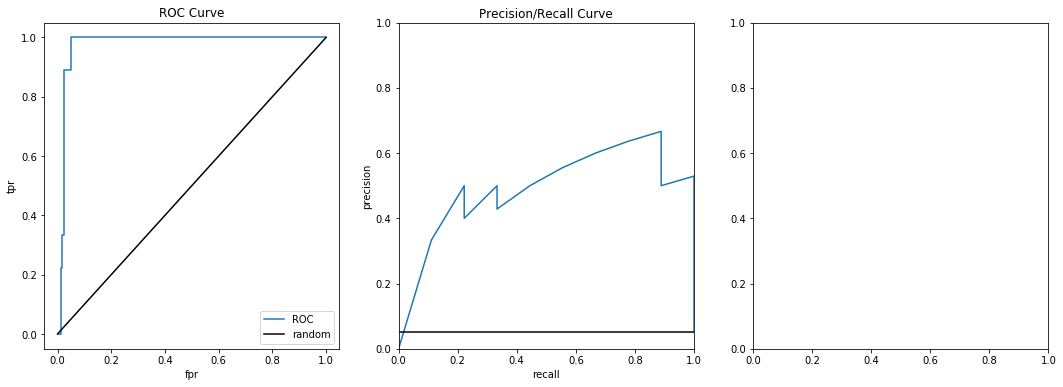

In [232]:
fig, (ax0, ax1, ax3) = plt.subplots(1,3, figsize=(18,6))
df = calculate_threshold_values(model.predict_proba(X_test)[:,1], y_test)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)

In [221]:
y_test, probs

(1984-12    0
 1958-03    1
 1994-01    0
 1981-07    0
 1967-01    0
 1996-06    0
 2001-02    0
 2015-03    0
 1961-11    0
 1982-02    1
 1969-08    0
 1962-04    0
 1997-02    0
 2007-01    0
 2010-06    0
 1970-06    0
 1994-10    0
 2012-12    0
 1997-05    0
 1993-04    0
 2007-03    0
 1969-05    0
 1954-12    0
 2003-04    0
 1958-01    1
 1989-09    0
 1974-04    0
 2001-01    0
 2001-10    0
 1959-07    0
           ..
 1952-05    0
 2007-10    0
 2017-05    0
 1958-10    0
 2002-02    0
 2012-06    0
 1970-05    0
 1990-07    0
 1955-09    0
 1995-06    0
 1970-07    0
 2013-06    0
 1977-05    0
 1980-07    0
 1956-06    0
 2001-07    1
 1957-02    0
 1952-06    0
 1970-09    0
 1997-08    0
 1979-11    0
 1967-06    0
 2008-11    1
 1995-01    0
 1974-08    0
 1950-05    0
 1961-06    0
 2013-03    0
 1968-06    0
 1981-12    0
 Name: Recession, Length: 172, dtype: int64,
 array([[9.90191194e-01, 9.80880646e-03],
        [7.25267844e-01, 2.74732156e-01],
        [9.965412

In [272]:
results = pd.DataFrame(probs)

In [234]:
y_test[1]

0

In [273]:
results['actual'] = y_test.values

In [274]:
results.index = y_test.index

In [275]:
results

,0,1,actual
1997-09,1.000000,4.256408e-08,0
1997-10,1.000000,4.785021e-09,0
1997-11,1.000000,1.508841e-08,0
1997-12,1.000000,3.952608e-09,0
1998-01,1.000000,1.417481e-08,0
1998-02,1.000000,9.662837e-10,0
1998-03,1.000000,5.628437e-10,0
1998-04,1.000000,5.490078e-10,0
1998-05,1.000000,1.832564e-10,0
1998-06,1.000000,1.211367e-10,0


In [242]:
recent_X = X.iloc[-250:]
recent_y = y.iloc[-250:]

In [243]:
probs_recent = model.predict_proba(recent_X)

In [245]:
results = pd.DataFrame(probs_recent)
results['actual'] = recent_y.values
results.index = recent_y.index

In [248]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(results)

                0         1  actual
1998-06  0.990356  0.009644       0
1998-07  0.991270  0.008730       0
1998-08  0.989246  0.010754       0
1998-09  0.990020  0.009980       0
1998-10  0.991819  0.008181       0
1998-11  0.991141  0.008859       0
1998-12  0.992931  0.007069       0
1999-01  0.992321  0.007679       0
1999-02  0.988948  0.011052       0
1999-03  0.989706  0.010294       0
1999-04  0.987186  0.012814       0
1999-05  0.988227  0.011773       0
1999-06  0.985842  0.014158       0
1999-07  0.985536  0.014464       0
1999-08  0.986845  0.013155       0
1999-09  0.986106  0.013894       0
1999-10  0.986945  0.013055       0
1999-11  0.986712  0.013288       0
1999-12  0.986196  0.013804       0
2000-01  0.984301  0.015699       0
2000-02  0.980951  0.019049       0
2000-03  0.978367  0.021633       0
2000-04  0.982331  0.017669       0
2000-05  0.974646  0.025354       0
2000-06  0.973417  0.026583       0
2000-07  0.972684  0.027316       0
2000-08  0.977579  0.022421 

In [249]:
quandl.get('SGE/NGABCONF')

,Value
Date,
2008-06-30,10.16
2008-09-30,15.00
2008-12-31,3.80
2009-03-31,-1.20
2009-06-30,-8.60
2009-09-30,-6.40
2009-12-31,-1.87
2010-03-31,10.00
2010-06-30,12.30
